### <center> <span style = 'color:#ff272c'> ZOMATO DATASET - DATA CLEANING AND BASIC NTLK </span> </center>

In [2]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
zomato = pd.read_csv('zomato.csv')

In [20]:
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [10]:
#dropping unnecessary columns for analysis - url, phone
zomato.drop(columns=['url','phone'],inplace=True)


### <span style = 'color:#ff272c'><I> CLEANING <br><br>RATINGS COLUMN</I></span>

In [27]:
#looking whether all the ratings are out of 5 and the cases where ratings are null or something other than ratings are found
r=zomato.rate.str.split('/',expand=True)
r[(r[1].isna()) & ~(r[0].isna())][0].value_counts()
#all the ratings have been divided by 5 apart from the null values in the columns there are values like "NEW" and "-" are present

NEW    2208
-        69
Name: 0, dtype: int64

In [28]:
#thus keeping only the ratings and removing /5 from the rate column
zomato['rate']=zomato.rate.str.split('/',expand=True)[0]

In [33]:
#checking whether there are any votes available for the - rated restuarant
zomato[zomato.rate=='-'].votes.value_counts()

0    69
Name: votes, dtype: int64

In [35]:
#checking whether there are any votes available for the NEW rated restuarant
zomato[zomato.rate=='NEW'].votes.value_counts()

0    2208
Name: votes, dtype: int64

In [39]:
#checking whether there are any votes available for the restuarant with null ratings
zomato[zomato.rate.isna()].votes.value_counts(bins=[0,0.9,5000])
#this reveals that there are missing values in ratings even when the customers have voted for the restaurant
#there are 44 restaurants with votes but has null ratings

(-0.001, 0.9]    7731
(0.9, 5000.0]      44
Name: votes, dtype: int64

In [44]:
print('Total nulls:',zomato.rate.isna().sum())
print('Rows with New as value:',(zomato.rate=='NEW').sum())
print('Rows with - as value:',(zomato.rate=='-').sum())

Total nulls: 7775
Rows with New as value: 2208
Rows with - as value: 69


In [60]:
#filling all nulls that has no votes and - as 0
#creating a new column to denote whether the restuarant is new or not - assuming that only the new values in the ratings column are new restaurants
#making the new value as 0 after creating the new column

zomato['New_Restaurant']=np.where(zomato.rate=="NEW",'Yes','No')
ratings = np.where((zomato.rate.isna()) & (zomato.votes==0),0,zomato.rate)
ratings = np.where(ratings=='-',0,ratings)
ratings = np.where(ratings=='NEW',0,ratings)
zomato['rate']=ratings


In [67]:
#these null values can be imputed approriately once some basic nltk is performed in the reviews, or the averge of ratings
#mentioned in the reviews can be taken for the same
zomato.rate.isna().sum()

44

In [76]:
#checking for other null columns
zomato.isna().sum()

address                            0
name                               0
online_order                       0
book_table                         0
rate                              44
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
New_Restaurant                     0
dtype: int64

### <span style = 'color:#ff272c'><I> ONLINE ORDER COLUMN</I></span>

In [77]:
zomato.online_order.value_counts()
#online_order column is clean

Yes    30444
No     21273
Name: online_order, dtype: int64

### <span style = 'color:#ff272c'><I> BOOK TABLE COLUMN</I></span>

In [78]:
zomato.book_table.value_counts()
#book_table column is clean

No     45268
Yes     6449
Name: book_table, dtype: int64

### <span style = 'color:#ff272c'><I> VOTES COLUMN</I></span>

In [80]:
zomato.votes
#the whole column is in int datatype- therefore votes column is also clean

0        775
1        787
2        918
3         88
4        166
        ... 
51712     27
51713      0
51714      0
51715    236
51716     13
Name: votes, Length: 51717, dtype: int64

### <span style = 'color:#ff272c'> <I> LOCATION COLUMN </I></span>

In [141]:
loc = zomato.location.str.split(",",expand=True)
loc = np.where(loc[1]==' Whitefield','Whitefield',loc[0])
zomato['location']=loc
zomato['location']= zomato['location'].str.strip().str.upper()

In [149]:
zomato[zomato['location'].isna()]
#most of the values for these rows are null - dropping the rows as the count is less
zomato.drop(index=zomato[zomato['location'].isna()].index,inplace=True)

### <span style = 'color:#ff272c'> <I> BASIC NTLK AND CUSINE ANALYSIS FOR FURTHER CLEANING </I></span>

In [101]:
#total unique values mentioned in cusines
zomato.cuisines.str.split(",").explode().str.strip().unique()

array(['North Indian', 'Mughlai', 'Chinese', 'Thai', 'Cafe', 'Mexican',
       'Italian', 'South Indian', 'Rajasthani', 'Andhra', 'Pizza',
       'Continental', 'Momos', 'Beverages', 'Fast Food', 'American',
       'French', 'European', 'Bakery', 'Burger', 'Desserts', 'Biryani',
       'Street Food', 'Rolls', 'Ice Cream', 'Healthy Food', 'Salad',
       'Asian', 'Korean', 'Indonesian', 'Japanese', 'Goan', 'Seafood',
       'Kebab', 'Steak', 'Mithai', 'Iranian', 'Sandwich', 'Juices',
       'Mangalorean', 'Vietnamese', 'Hyderabadi', 'Bengali', 'Arabian',
       'BBQ', 'Tea', 'Afghani', 'Lebanese', 'Finger Food', 'Tibetan', nan,
       'Charcoal Chicken', 'Middle Eastern', 'Mediterranean', 'Wraps',
       'Kerala', 'Oriya', 'Bihari', 'Roast Chicken', 'Maharashtrian',
       'Bohri', 'African', 'Nepalese', 'Turkish', 'Tamil', 'Tex-Mex',
       'Belgian', 'Gujarati', 'South American', 'Konkan', 'Drinks Only',
       'Awadhi', 'Chettinad', 'Coffee', 'Indian', 'Afghan',
       'Modern Indian

In [261]:
cuisines=zomato.cuisines.str.split(",").explode().str.strip().unique()

In [108]:
#total unique values mentioned in cusines
zomato.dish_liked.str.split(",").explode().str.strip().value_counts().head(20)

Pasta              3409
Burgers            3024
Cocktails          2832
Pizza              2737
Biryani            2092
Coffee             1994
Mocktails          1887
Sandwiches         1676
Paratha            1566
Noodles            1415
Salads             1391
Fish               1368
Nachos             1365
Chicken Biryani    1330
Beer               1268
Mutton Biryani     1100
Tea                1039
Thali              1004
Rolls               991
Waffles             979
Name: dish_liked, dtype: int64

In [115]:
zomato.rest_type.str.split(",").explode().str.strip().value_counts()

Quick Bites       20639
Casual Dining     13057
Cafe               5074
Delivery           4641
Dessert Parlor     3211
Bar                2457
Takeaway           2157
Bakery             1998
Beverage Shop      1471
Pub                 950
Food Court          765
Sweet Shop          745
Lounge              555
Fine Dining         405
Microbrewery        390
Mess                274
Kiosk               192
Food Truck           84
Confectionery        47
Club                 41
Dhaba                40
Irani Cafee          15
Meat Shop             4
Bhojanalya            3
Pop Up                2
Name: rest_type, dtype: int64

In [ ]:
#do basic ntlk on reviews - polarity scores - bag of words approach, number of reviews (to average out)
#segregate restaurants cuisine to single, multicusine, major cusines segregation, number of cusines

In [225]:
#to know whether a restaurnt is multiconcept and to know the maximum concepts being offered
zomato['rest_type_nos'] = zomato.rest_type.str.split(',').apply(length)

In [233]:
#total number of dishes liked in each restaurant
zomato['dishes_liked_nos']=zomato.dish_liked.str.split(',').apply(length)

In [241]:
#total number of cuisines
zomato['cuisines_nos']= zomato.cuisines.str.split(',').apply(length)

In [221]:
def length(i):
    if type(i)!= float:
        return len(i)
    else:
        return 0

In [237]:
zomato['dishes_liked_nos'].value_counts()

0    28057
7    13883
2     2017
3     1832
1     1755
4     1581
5     1368
6     1203
Name: dishes_liked_nos, dtype: int64

In [244]:
zomato['cuisines_nos'].value_counts()
#a maximum of 8 cuisines is being offered by a few resaurants

2    17920
1    12402
3    12172
4     5869
5     2044
6      680
7      395
8      190
0       24
Name: cuisines_nos, dtype: int64

In [247]:
#total number of duplicated rows
zomato.duplicated().sum()

43

In [252]:
#dropping the duplicated rows
zomato.drop(index=zomato[zomato.duplicated()].index,inplace=True)

In [301]:
zomato['NI_cuisine'] = zomato.cuisines.str.split(",").apply(north)

In [303]:
zomato['SI_cuisine'] =zomato.cuisines.str.split(",").apply(south)

In [307]:
zomato['Chinese_cuisine']= zomato.cuisines.str.split(",").apply(chinese)

In [299]:
def north(cuisines):
    if type(cuisines)!=float:
        for cuisine in cuisines:
            if cuisine == 'North Indian':
                return 1
            else:
                return 0
            
def south(cuisines):
    if type(cuisines)!=float:
        for cuisine in cuisines:
            if cuisine == 'South Indian':
                return 1
            else:
                return 0
            
def chinese(cuisines):
    if type(cuisines)!=float:
        for cuisine in cuisines:
            if cuisine == 'Chinese':
                return 1
            else:
                return 0

In [265]:
import difflib as diff

In [279]:
for cuisine in cuisines:
    print(diff.get_close_matches(str(cuisine),cuisines.astype('str'),3,0.9))
#afghan and afghani is similar

['North Indian']
['Mughlai']
['Chinese']
['Thai']
['Cafe']
['Mexican']
['Italian']
['South Indian']
['Rajasthani']
['Andhra']
['Pizza']
['Continental']
['Momos']
['Beverages']
['Fast Food']
['American']
['French']
['European']
['Bakery']
['Burger']
['Desserts']
['Biryani']
['Street Food']
['Rolls']
['Ice Cream']
['Healthy Food']
['Salad']
['Asian']
['Korean']
['Indonesian']
['Japanese']
['Goan']
['Seafood']
['Kebab']
['Steak']
['Mithai']
['Iranian']
['Sandwich']
['Juices']
['Mangalorean']
['Vietnamese']
['Hyderabadi']
['Bengali']
['Arabian']
['BBQ']
['Tea']
['Afghani', 'Afghan']
['Lebanese']
['Finger Food']
['Tibetan']
['nan']
['Charcoal Chicken']
['Middle Eastern']
['Mediterranean']
['Wraps']
['Kerala']
['Oriya']
['Bihari']
['Roast Chicken']
['Maharashtrian']
['Bohri']
['African']
['Nepalese']
['Turkish']
['Tamil']
['Tex-Mex']
['Belgian']
['Gujarati']
['South American']
['Konkan']
['Drinks Only']
['Awadhi']
['Chettinad']
['Coffee']
['Indian']
['Afghan', 'Afghani']
['Modern Indian']
['

In [310]:
import nltk

In [314]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [317]:
sia = SentimentIntensityAnalyzer()

In [350]:
pos,neg,neu,comp,n=0,0,0,0,0

for comment in zomato.reviews_list[0].split(')'):
    scores = sia.polarity_scores(comment)
    if scores['compound']!=0:
        pos+=scores['pos']
        neg+=scores['neg']
        neu+=scores['neu']
        comp+=scores['compound']
        n+=1
print(pos/n,neg/n,neu/n,comp/n)
pos,neg,neu,comp,n=0,0,0,0,0


0.21341666666666667 0.026833333333333338 0.75975 0.8078333333333334


In [347]:
scores['compound']

0.0

In [344]:
scores = sia.polarity_scores(comment)

In [393]:
pos,neg,neu,comp,n=0,0,0,0,0
counter=-1
for i in zomato.reviews_list:
    counter+=1
    for comment in i.split(')'):
        scores = sia.polarity_scores(comment)
        if scores['compound']!=0:
            pos+=scores['pos']
            neg+=scores['neg']
            neu+=scores['neu']
            comp+=scores['compound']
            n+=1
    if n!=0:
        zomato.iloc[counter,22] = round(pos/n,3)
        zomato.iloc[counter,23] = round(neg/n,3)
        zomato.iloc[counter,24] = round(neu/n,3)
        zomato.iloc[counter,25] = round(comp/n,3)
        zomato.iloc[counter,26]= n
    pos,neg,neu,comp,n=0,0,0,0,0

In [388]:
zomato['reviews_positivity']=np.NAN
zomato['reviews_negativity']=np.NAN
zomato['review_neutrality']=np.NAN
zomato['reviews_compound']=np.NAN
zomato['total_reviews']=np.NAN

C:\Users\Sriram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rate', ylabel='reviews_negativity'>

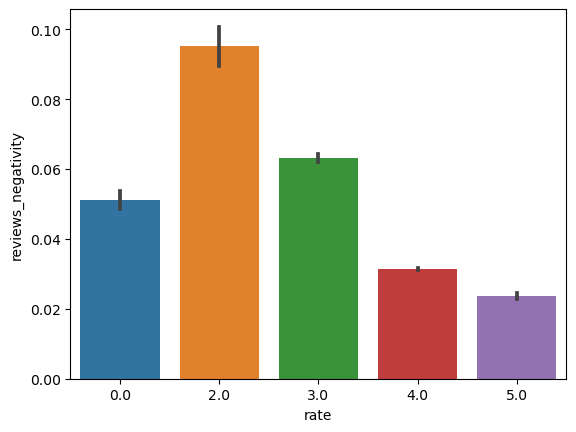

In [402]:
sns.barplot(round(zomato.rate.astype(float)),zomato.reviews_negativity.astype(float))

In [4]:
zomato.isna().sum()

address                            0
name                               0
online_order                       0
book_table                         0
rate                              44
votes                              0
location                           0
rest_type                        206
dish_liked                     28026
cuisines                          24
approx_cost(for two people)      324
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
New_Restaurant                     0
rest_type_nos                      0
dishes_liked_nos                   0
cuisines_nos                       0
NI_cuisine                        24
SI_cuisine                        24
Chinese_cuisine                   24
reviews_positivity              7886
reviews_negativity              7886
review_neutrality               7886
reviews_compound                7886
total_reviews                   7886
d

### <span style = 'color:#ff272c'> <I> RATING COLUMN </I></span>

In [5]:
# rate - based on the sentiment of reviews fill where ever possible
# rest_type - appropriate values can be filled using cuisines
# cuisines - has to be explored to check whether there is a way to fill appropriate value
# approx cost can be filled appropriately using cuisines


zomato[zomato.rate.isna()]

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,...,dishes_liked_nos,cuisines_nos,NI_cuisine,SI_cuisine,Chinese_cuisine,reviews_positivity,reviews_negativity,review_neutrality,reviews_compound,total_reviews
21002,"718, 1st C Main, 45th Cross, 8th Block, Jayana...",Shivaji Military Hotel,No,No,NaN,2497,JAYANAGAR,Casual Dining,"Mutton Biryani, Mutton Fry, Donne Biryani, Chi...","South Indian, Biryani",...,7,2,0.0,1.0,0.0,0.124,0.044,0.832,0.463,54.0
21010,"278/A, 9th Main Road, 4th Block, Jayanagar, Ba...",Once Upon a Rooftop,No,Yes,NaN,1251,JAYANAGAR,"Casual Dining, Bar","Pizza, Pasta, Cocktails, Churros, Mushroom Sou...","Pizza, Italian, Chinese, Thai",...,7,4,0.0,0.0,0.0,0.240,0.024,0.736,0.802,70.0
21012,"359/38,Next to Fabindia, 7th Cross, 1st Block,...",Toscano,Yes,Yes,NaN,1137,JAYANAGAR,Casual Dining,"Pasta, Salads, Calamari, Ravioli, Pumpkin Soup...","Italian, Salad",...,7,2,0.0,0.0,0.0,0.216,0.007,0.777,0.773,33.0
21037,"234, 32 A Cross, 2nd Main Road, 7th Block, Jay...",Prems Graama Bhojanam,Yes,No,NaN,326,JAYANAGAR,Casual Dining,"Veg Thali, Matka Kulfi, Pongal, Buttermilk, Va...",South Indian,...,7,1,0.0,1.0,0.0,0.195,0.029,0.776,0.762,14.0
21040,"The Royal Comfort, 453/2/16, 27th Cross, 4th B...",Saarangi Fine Dining,No,No,NaN,285,JAYANAGAR,Casual Dining,"Panipuri, Pongal, Paneer Manchurian, Coffee, P...","North Indian, Chinese, South Indian",...,7,3,1.0,0.0,0.0,0.085,0.059,0.856,0.485,1.0
21048,"22, 2nd Main Road, National College Road, 7th ...",The Airos,Yes,No,NaN,131,JAYANAGAR,Cafe,"Pizza, Pasta, Nachos, Burgers, Sandwich, Tea, ...","Cafe, Italian, Pizza",...,7,3,0.0,0.0,0.0,0.238,0.006,0.756,0.878,11.0
21057,"24, 8th C Main, Behind Post Office, 4th Block,...",Udupi Sri Krishna Cafe,Yes,No,NaN,16,JAYANAGAR,Casual Dining,NaN,"North Indian, South Indian",...,0,2,1.0,0.0,0.0,0.134,0.000,0.866,0.907,2.0
21087,"29/1, 30th Cross, 4th T Block, Thilknagar, Jay...",Tawa Sagara,No,No,NaN,122,JAYANAGAR,Casual Dining,"Sea Food, Biryani, Fish Thali, Neer Dosa, Murg...","Mangalorean, Seafood",...,5,2,0.0,0.0,0.0,0.249,0.028,0.723,0.688,286.0
21092,"310, 9th Main Road, 5th Block, Jayanagar, Bang...",Vindu Andhra Ruchulu,Yes,No,NaN,283,JAYANAGAR,Casual Dining,"Raita, Chicken Curry, Fish, Mutton Biryani, Be...","Biryani, North Indian, Andhra",...,7,3,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
21093,"382/71/4, 11th Main, 3rd Block, Jayanagar, Ban...",Bella,Yes,Yes,NaN,143,JAYANAGAR,Casual Dining,"Ghee Roast Paneer, Murgh Ghee Roast, Fish Fry,...","Mangalorean, Seafood, South Indian",...,7,3,0.0,0.0,0.0,0.116,0.082,0.802,0.003,5.0


In [49]:
#since the rating has only 44 missing values. filling it with mean/median of the entire column
zomato[zomato.rate!=0].rate.describe()
# the mean or median leaving out the restaurants that doesnt have any rating

count    41638.000000
mean         3.700452
std          0.440558
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

In [51]:
zomato['rate']=zomato.rate.fillna(round(zomato[zomato.rate!=0].rate.mean(),1))

In [53]:
zomato.rest_type.describe()

count           51447
unique             93
top       Quick Bites
freq            19114
Name: rest_type, dtype: object

In [55]:
zomato[zomato.rest_type.isna()]

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,...,dishes_liked_nos,cuisines_nos,NI_cuisine,SI_cuisine,Chinese_cuisine,reviews_positivity,reviews_negativity,review_neutrality,reviews_compound,total_reviews
998,"77/2 BDA Road, Opposite RR Layout, BTM 6th Sta...",Mughlai Kitchen,Yes,No,3.5,269,BTM,NaN,"Momos, Oreo Shake","Mughlai, North Indian, Chinese, Momos",...,2,4,0.0,0.0,0.0,0.114,0.029,0.858,0.524,2.0
1299,"21, Saifee Apartment, 5th Cross, 22nd Main, Ne...",Eat & Joy Restaurant,Yes,No,3.0,7,JP NAGAR,NaN,NaN,"Fast Food, Finger Food",...,0,2,0.0,0.0,0.0,0.085,0.205,0.710,-0.676,2.0
1375,"7th Main, 18th Cross NS Palya, 2nd Stage",Kababish Restaurant,Yes,No,3.6,15,BTM,NaN,NaN,"North Indian, Chinese, Arabian",...,0,3,1.0,0.0,0.0,0.191,0.051,0.758,0.498,5.0
1564,"81/3, Hulimavu Road, Opposite Meenakshi Mall, ...",Goli Vada Pav No 1,No,No,0.0,0,BANNERGHATTA ROAD,NaN,NaN,"Street Food, Burger",...,0,2,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1636,"3, 1st Cross, Kalyani Kala Mandir, Bannerghatt...",Ammi's Biryani,No,No,2.4,392,BANNERGHATTA ROAD,NaN,"Chicken Biryani, Hyderabadi Biryani, Rolls, Mu...","Biryani, North Indian",...,7,2,0.0,0.0,0.0,0.166,0.102,0.733,0.026,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50914,"Seegahalli Road, Whitefield, Bangalore",Snack Itt,No,No,0.0,0,WHITEFIELD,NaN,NaN,Bakery,...,0,1,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
51066,"13/72, 1st Floor, Nallurhalli Road, Siddhapura...",Pindi Bangalore,Yes,No,0.0,0,WHITEFIELD,NaN,NaN,"North Indian, Chinese, Biryani, Street Food",...,0,4,1.0,0.0,0.0,0.222,0.117,0.661,0.572,1.0
51131,"107, Praveen Transport Complex, ITPL Back Gate...",Special Biryani House,Yes,No,3.2,202,WHITEFIELD,NaN,NaN,"North Indian, Biryani, Chinese",...,0,3,1.0,0.0,0.0,0.118,0.059,0.823,0.111,2.0
51230,"1, Building 2, KCB Brick Factory Campus, Near ...",Red Roost,No,No,0.0,0,WHITEFIELD,NaN,NaN,"North Indian, South Indian",...,0,2,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [6]:
zomato[zomato.rate.isna() & ~(zomato.total_reviews.isna())]

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,...,dishes_liked_nos,cuisines_nos,NI_cuisine,SI_cuisine,Chinese_cuisine,reviews_positivity,reviews_negativity,review_neutrality,reviews_compound,total_reviews
21002,"718, 1st C Main, 45th Cross, 8th Block, Jayana...",Shivaji Military Hotel,No,No,NaN,2497,JAYANAGAR,Casual Dining,"Mutton Biryani, Mutton Fry, Donne Biryani, Chi...","South Indian, Biryani",...,7,2,0.0,1.0,0.0,0.124,0.044,0.832,0.463,54.0
21010,"278/A, 9th Main Road, 4th Block, Jayanagar, Ba...",Once Upon a Rooftop,No,Yes,NaN,1251,JAYANAGAR,"Casual Dining, Bar","Pizza, Pasta, Cocktails, Churros, Mushroom Sou...","Pizza, Italian, Chinese, Thai",...,7,4,0.0,0.0,0.0,0.240,0.024,0.736,0.802,70.0
21012,"359/38,Next to Fabindia, 7th Cross, 1st Block,...",Toscano,Yes,Yes,NaN,1137,JAYANAGAR,Casual Dining,"Pasta, Salads, Calamari, Ravioli, Pumpkin Soup...","Italian, Salad",...,7,2,0.0,0.0,0.0,0.216,0.007,0.777,0.773,33.0
21037,"234, 32 A Cross, 2nd Main Road, 7th Block, Jay...",Prems Graama Bhojanam,Yes,No,NaN,326,JAYANAGAR,Casual Dining,"Veg Thali, Matka Kulfi, Pongal, Buttermilk, Va...",South Indian,...,7,1,0.0,1.0,0.0,0.195,0.029,0.776,0.762,14.0
21040,"The Royal Comfort, 453/2/16, 27th Cross, 4th B...",Saarangi Fine Dining,No,No,NaN,285,JAYANAGAR,Casual Dining,"Panipuri, Pongal, Paneer Manchurian, Coffee, P...","North Indian, Chinese, South Indian",...,7,3,1.0,0.0,0.0,0.085,0.059,0.856,0.485,1.0
21048,"22, 2nd Main Road, National College Road, 7th ...",The Airos,Yes,No,NaN,131,JAYANAGAR,Cafe,"Pizza, Pasta, Nachos, Burgers, Sandwich, Tea, ...","Cafe, Italian, Pizza",...,7,3,0.0,0.0,0.0,0.238,0.006,0.756,0.878,11.0
21057,"24, 8th C Main, Behind Post Office, 4th Block,...",Udupi Sri Krishna Cafe,Yes,No,NaN,16,JAYANAGAR,Casual Dining,NaN,"North Indian, South Indian",...,0,2,1.0,0.0,0.0,0.134,0.000,0.866,0.907,2.0
21087,"29/1, 30th Cross, 4th T Block, Thilknagar, Jay...",Tawa Sagara,No,No,NaN,122,JAYANAGAR,Casual Dining,"Sea Food, Biryani, Fish Thali, Neer Dosa, Murg...","Mangalorean, Seafood",...,5,2,0.0,0.0,0.0,0.249,0.028,0.723,0.688,286.0
21093,"382/71/4, 11th Main, 3rd Block, Jayanagar, Ban...",Bella,Yes,Yes,NaN,143,JAYANAGAR,Casual Dining,"Ghee Roast Paneer, Murgh Ghee Roast, Fish Fry,...","Mangalorean, Seafood, South Indian",...,7,3,0.0,0.0,0.0,0.116,0.082,0.802,0.003,5.0
21097,"126, Near Ganesha Temple, 7th Main, 4th Block,...",The Grillo,Yes,Yes,NaN,80,JAYANAGAR,Casual Dining,NaN,"North Indian, Mughlai, Chinese, South Indian, ...",...,0,5,1.0,0.0,0.0,0.114,0.028,0.859,0.314,3.0


C:\Users\Sriram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


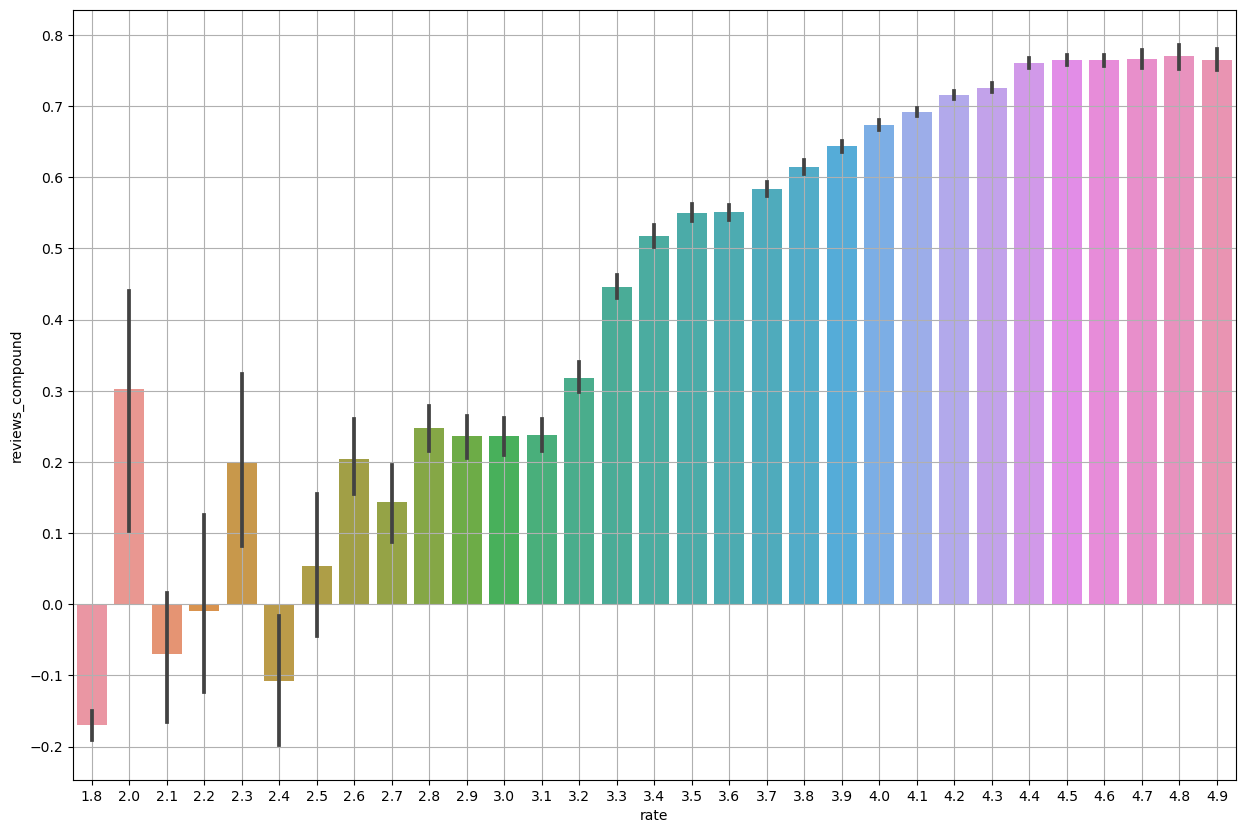

In [26]:
#checking whether the basic sentiment analysis performed with the reivews is in line with the overall ratings
zom =zomato[(zomato.rate!=0) & ~ (zomato.total_reviews.isna())]

plt.figure(figsize=(15,10))
sns.barplot(round(zom.rate.astype(float),1),zom.reviews_compound.astype(float))
plt.yticks([-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
plt.grid()
plt.show()

In [13]:
zomato.rate.value_counts(bins=[0.1,1,2,3,4,5])

(3.0, 4.0]      29149
(4.0, 5.0]       9210
(2.0, 3.0]       3263
(1.0, 2.0]         16
(0.099, 1.0]        0
Name: rate, dtype: int64

In [ ]:
#Though there are some fluctions in the initail part of the graph when the ratings are less than 2.8, the graph is stable after that point
#it is clear from the above metric and bar graph that the ratings and values from the setiment analysis has fair amount of postive correlated.



In [17]:
(zomato.rate==zomato.rate.max()).sum()

55

In [44]:
zom[round(zom['reviews_compound'],3)==0.800].rate.max()

4.9

In [56]:
zomato.isna().sum()

address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
location                           0
rest_type                        206
dish_liked                     28026
cuisines                          24
approx_cost(for two people)      324
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
New_Restaurant                     0
rest_type_nos                      0
dishes_liked_nos                   0
cuisines_nos                       0
NI_cuisine                        24
SI_cuisine                        24
Chinese_cuisine                   24
reviews_positivity              7886
reviews_negativity              7886
review_neutrality               7886
reviews_compound                7886
total_reviews                   7886
d

### <span style = 'color:#ff272c'> <I> RESTAURANT TYPE COLUMN </I></span>

In [75]:
zomato[(zomato.rest_type.isna())].cuisines.str.split(',',expand=True)[0].unique()

array(['Mughlai', 'Fast Food', 'North Indian', 'Street Food', 'Biryani',
       'Beverages', 'Chinese', 'Seafood', 'Kerala', 'Parsi', 'Mithai',
       'Pizza', 'Continental', 'Turkish', 'Andhra', 'Italian',
       'Indonesian', 'Bakery', 'Rolls', 'Desserts'], dtype=object)

In [ ]:
#filling in the rest_type using the cusines column. taking only the single cuisine  restaurant and appropriate similar value is filled for the rest_type
similar = {'Beverages':'Beverage Shop', 'North Indian':'Casual Dining', 'Biryani':'Quick Bites', 'Parsi':'Casual Dining', 'Andra'

In [103]:
#checking restaurant types for all types of restaurants to arrive at a conclusion to fill in more appropriate values for the null rows
zomato[zomato.cuisines == 'Desserts'].rest_type.value_counts()

Dessert Parlor                 561
Takeaway, Delivery              56
Confectionery                   44
Delivery                        39
Dessert Parlor, Quick Bites     19
Bakery, Dessert Parlor          18
Quick Bites                     12
Takeaway                         5
Food Court                       5
Quick Bites, Dessert Parlor      3
Pop Up                           2
Dessert Parlor, Food Court       2
Name: rest_type, dtype: int64

In [ ]:
#This analysis is being done to fill in the most appropriate values even though there are less number of null rows
#This is to give attention to details and also to make it a practice to follow the right strategy
#This step can be avoided if there is time constraint

#bakery - Bakery
#beverages - Beverage Shop
#mithai - Sweet Shop
#Turkish - Kiosk
#Italian,Indonesian,Parsi - Casual Dining
#Desserts- Dessert Parlor

#parsi - all are null (parsi foods are mostly meal typed) - so filling- casual dining
#others are quick bites
#mughlai,fastfood,Street Food, Seafood, Kerala,pizza,continental, Andhra, Rolls,north indian, Chinese  - Quick Bites

In [169]:
zomato['rest_type'] = np.where((zomato.rest_type.isna())&(zomato.cuisines.str.split(',',expand=True)[0]=='Bakery'),'Bakery',zomato.rest_type)
zomato['rest_type'] = np.where((zomato.rest_type.isna())&(zomato.cuisines.str.split(',',expand=True)[0]=='Beverages'),'Beverage Shop',zomato.rest_type)
zomato['rest_type'] = np.where((zomato.rest_type.isna())&(zomato.cuisines.str.split(',',expand=True)[0]=='Mithai'),'Sweet Shop',zomato.rest_type)
zomato['rest_type'] = np.where((zomato.rest_type.isna())&(zomato.cuisines.str.split(',',expand=True)[0]=='Turkish'),'Kiosk',zomato.rest_type)
zomato['rest_type'] = np.where((zomato.rest_type.isna())&(zomato.cuisines.str.split(',',expand=True)[0]=='Dessert Parlor'),'Kiosk',zomato.rest_type)
zomato['rest_type'] = (np.where((zomato.rest_type.isna())&((zomato.cuisines.str.split(',',expand=True)[0]=='Italian') | (zomato.cuisines.str.split(',',expand=True)[0]=='Indonesian')|(zomato.cuisines.str.split(',',expand=True)[0]=='Parsi')),'Casual Dining',zomato.rest_type))
zomato['rest_type'] = np.where((zomato.rest_type.isna()),'Quick Bites',zomato.rest_type)

In [168]:
((zomato.rest_type.isna())&(zomato.cuisines.str.split(',',expand=True)[0]=='Turkish')).sum()

5

In [102]:
zomato[zomato.cuisines.str.contains('Indonesian').astype(bool)].rest_type.value_counts()

Casual Dining                 54
Quick Bites                   28
Casual Dining, Bar            22
Delivery                       9
Beverage Shop                  2
Beverage Shop, Quick Bites     2
Takeaway, Delivery             2
Food Court                     1
Dessert Parlor                 1
Name: rest_type, dtype: int64

In [107]:
#most of the other values are null in the rows where cuisine is null so dropping these rows
ind = zomato[zomato.cuisines.isna()].index
zomato.drop(index=ind,inplace = True)

In [111]:
#most of the menu item column is empty list - dropping the column
zomato.drop(columns='menu_item',inplace = True)

### <span style = 'color:#ff272c'> <I> APPROX. COST FOR 2 PEOPLE COLUMN </I></span>

In [120]:
#converting the approx_cost of people from str to float
cuisines=zomato[zomato['approx_cost(for two people)'].isna()].cuisines.str.split(",",expand=True)[0].unique()

In [129]:
zomato['approx_cost(for two people)']= zomato['approx_cost(for two people)'].str.replace(',','').astype(float)

In [154]:
#loop thro all the items
#take each item and find its average two person cost
#put that in the null rows
import math
for cuisine in cuisines:
    mean_price = (zomato[zomato.cuisines.str.split(",",expand=True)[0]==cuisine]['approx_cost(for two people)'].mean())
    rounded_price = math.ceil(mean_price/10)*10
    zomato['approx_cost(for two people)']=np.where((zomato['approx_cost(for two people)'].isna())&(zomato.cuisines.str.split(",",expand=True)[0]==cuisine),rounded_price,zomato['approx_cost(for two people)'])
    

### <span style = 'color:#ff272c'> <I> EXPORTING THE CLEANED DATASET </I></span>

In [171]:
zomato.to_csv('zomato_cleaned.csv',index=False)